In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import time
from datetime import timedelta

## Часть 1. Простой пример для начала (вручную заданный набор данных)

In [2]:
price = np.array([6.,6.05,6.1])
sales = np.array([802000.,967000.,1132000.,])
revenue = price*sales
cost_price = 0.55*revenue
gross_profit = revenue-cost_price
operating_cost = 0.15*gross_profit
net_profit_bt = gross_profit-operating_cost
tax = 0.32*net_profit_bt
CF = net_profit_bt-tax
CF = np.insert(CF,0,-3400000.,axis=0)
NPV = np.npv(0.1,CF)
IRR = np.irr(CF)
print("NPV =",NPV,"   IRR =",IRR)

NPV = 344796.1010518393    IRR = 0.15331410149124514


<ipython-input-2-22943366ea7f>:11: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  NPV = np.npv(0.1,CF)
<ipython-input-2-22943366ea7f>:12: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  IRR = np.irr(CF)


## Часть 2. Вероятностная модель (данные задаются с каким-то распределением случайно)

In [3]:
start_time = time.monotonic()

n = 100000
np.random.seed(42)
price = np.array([np.random.triangular(5.9,6.,6.1,size = n),
          np.random.triangular(5.95,6.05,6.15,size = n),
          np.random.triangular(6.,6.1,6.2,size = n)])
sales = np.array([np.random.normal(802000.,25000.,n),
                  np.random.normal(967000.,30000.,n),
                  np.random.normal(1132000.,25000.,n)])
revenue = price*sales
cost_price = np.random.triangular(0.5,0.55,0.65,size = (3,n))*revenue
gross_profit = revenue-cost_price
operating_cost = np.random.normal(0.15,0.02,(3,n))*gross_profit
net_profit_bt = gross_profit-operating_cost
tax = 0.32*net_profit_bt
CF = net_profit_bt-tax
CF = np.insert(CF,0,np.full(n,-3400000),axis=0)
NPV = []
for i in np.arange(n):
    NPV_i = np.npv(0.1,CF[:,i])
    NPV.append(NPV_i)
IRR = []
for i in np.arange(n):
    IRR_i = np.irr(CF[:,i])
    IRR.append(IRR_i)

end_time = time.monotonic()
time1 = timedelta(seconds = end_time - start_time)

<ipython-input-3-1d71bd765024>:21: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  NPV_i = np.npv(0.1,CF[:,i])
<ipython-input-3-1d71bd765024>:25: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  IRR_i = np.irr(CF[:,i])


## Часть 3. Визуализация

мат.ожидание npv:  205624.66644759593 
мат.ожидание irr:  0.1317856388185533 
npv перцентили  {10.0: -14425.36457726406, 50.0: 208513.79703140445, 90.0: 421935.6749956005} 
irr перцентили  {10.0: 0.09772501647439724, 50.0: 0.1324499258211569, 90.0: 0.1650479302081238}

время выполнения кода:  0:00:15.499000


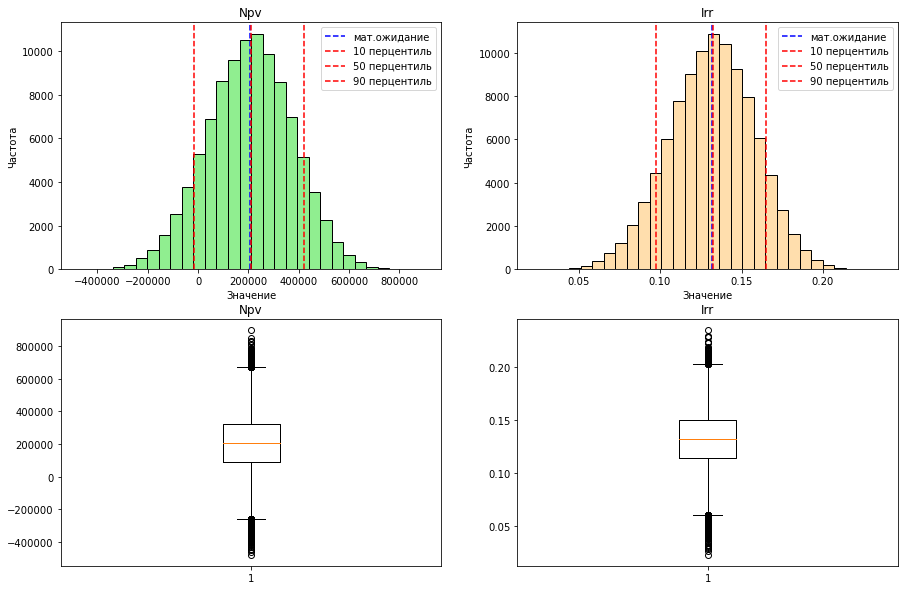

In [4]:
start_time = time.monotonic()

fig = plt.figure()
fig.set_size_inches(15,10)
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('Npv')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Частота')
ax1.hist(NPV, bins=30,color ="lightgreen",edgecolor = 'black');
ax1.axvline(np.mean(NPV), color='b', linestyle='dashed', linewidth=1.5, label = 'мат.ожидание');
NPV_sorted = list(NPV)
NPV_sorted.sort()
npv_perc = {i*100: NPV_sorted[int(i * len(NPV_sorted))] for i in [0.1,0.5,0.9]}
ax1.axvline(npv_perc[10], color='r', linestyle='dashed', linewidth=1.5, label = '10 перцентиль');
ax1.axvline(npv_perc[50], color='r', linestyle='dashed', linewidth=1.5, label = '50 перцентиль');
ax1.axvline(npv_perc[90], color='r', linestyle='dashed', linewidth=1.5, label = '90 перцентиль');
ax1.legend(loc = 'best');

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Irr')
ax2.set_xlabel('Значение')
ax2.set_ylabel('Частота')
ax2.hist(IRR, bins=30,color ="navajowhite",edgecolor = 'black');
ax2.axvline(np.mean(IRR), color='b', linestyle='dashed', linewidth=1.5, label = 'мат.ожидание');
IRR_sorted = list(IRR)
IRR_sorted.sort()
irr_perc = {i*100: IRR_sorted[int(i * len(IRR_sorted))] for i in [0.1,0.5,0.9]}
ax2.axvline(irr_perc[10], color='r', linestyle='dashed', linewidth=1.5, label = '10 перцентиль');
ax2.axvline(irr_perc[50], color='r', linestyle='dashed', linewidth=1.5, label = '50 перцентиль');
ax2.axvline(irr_perc[90], color='r', linestyle='dashed', linewidth=1.5, label = '90 перцентиль');
ax2.legend(loc = 'best');

print('мат.ожидание npv: ',np.mean(NPV),
        '\nмат.ожидание irr: ',np.mean(IRR),
        '\nnpv перцентили ',npv_perc,
        '\nirr перцентили ',irr_perc)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Npv')
ax3.boxplot(NPV);

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Irr')
ax4.boxplot(IRR);

end_time = time.monotonic()
time2 = timedelta(seconds=end_time - start_time)
print('\nвремя выполнения кода: ',time1+time2)